In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

In [3]:
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 100
Batch_size = 32

In [4]:
train_dataset = pd.read_csv("/content/drive/MyDrive/FashionMNIST/fashion-mnist_train.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/FashionMNIST/fashion-mnist_test.csv")

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [6]:
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image, label

X, y = data_preprocessing(train_dataset)
X_test, y_test = data_preprocessing(test_dataset)

In [7]:
X_train, X_testt, y_train, y_testt = train_test_split(X, y, train_size=5000, test_size=7200, random_state=random_state)

In [8]:
X_train.shape

(5000, 28, 28, 1)

In [9]:
X_testt.shape

(7200, 28, 28, 1)

In [10]:
# CNN Model
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [11]:
# optimizer used = adam
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [12]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1)

Epoch 1/100
157/157 [==============================] - 11s 11ms/step - loss: 1.0030 - accuracy: 0.6528
Epoch 2/100
157/157 [==============================] - 2s 10ms/step - loss: 0.7005 - accuracy: 0.7484
Epoch 3/100
157/157 [==============================] - 1s 9ms/step - loss: 0.6042 - accuracy: 0.7824
Epoch 4/100
157/157 [==============================] - 2s 13ms/step - loss: 0.5606 - accuracy: 0.7962
Epoch 5/100
157/157 [==============================] - 2s 12ms/step - loss: 0.5225 - accuracy: 0.8074
Epoch 6/100
157/157 [==============================] - 2s 12ms/step - loss: 0.4866 - accuracy: 0.8224
Epoch 7/100
157/157 [==============================] - 1s 9ms/step - loss: 0.4774 - accuracy: 0.8252
Epoch 8/100
157/157 [==============================] - 1s 6ms/step - loss: 0.4362 - accuracy: 0.8354
Epoch 9/100
157/157 [==============================] - 1s 6ms/step - loss: 0.4185 - accuracy: 0.8456
Epoch 10/100
157/157 [==============================] - 1s 6ms/step - loss: 0.4203 - 

In [13]:
def salt_pepper(test_sequences,prob,salt=0,pepper=1):
  sampled_images = test_sequences
  for i in range(7200):
    for y in range(28):
      for x in range(28):
        r = np.random.random() 
        if r < prob:
          sampled_images[i][y][x] = salt
        elif r > 1-prob:
          sampled_images[i][y][x] = pepper
  return sampled_images

In [14]:
for i in range(1,6,1):
  noise = salt_pepper(X_testt, i/100)

In [15]:
noise__ = noise.reshape(X_testt.shape[0], 28, 28)

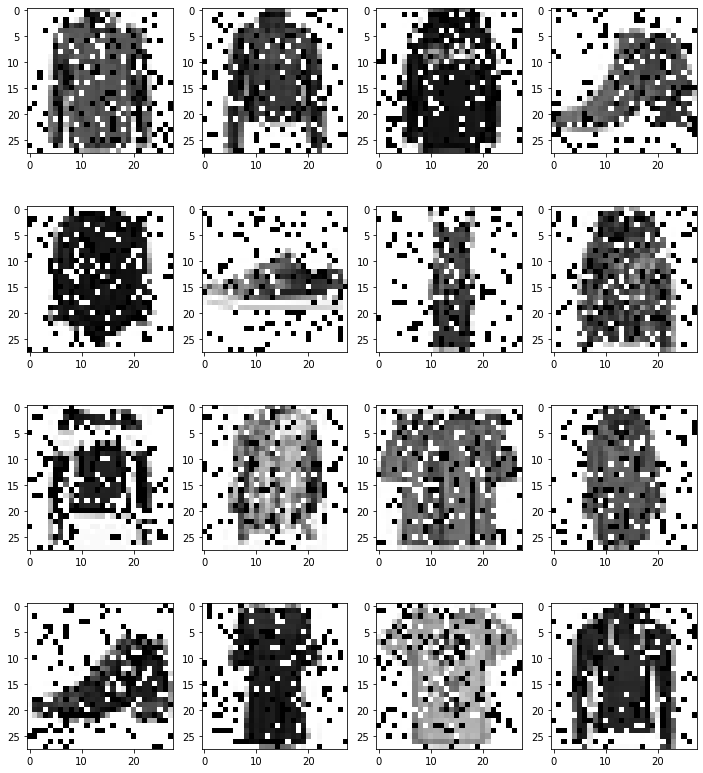

In [16]:
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(noise__[i], cmap='binary')

In [17]:
score = model.evaluate(X_testt, y_testt, steps=math.ceil(7200/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

225/225 [==============================] - 1s 3ms/step - loss: 5.2071 - accuracy: 0.2183
Test loss: 5.207057952880859
Test accuracy: 0.21833333373069763


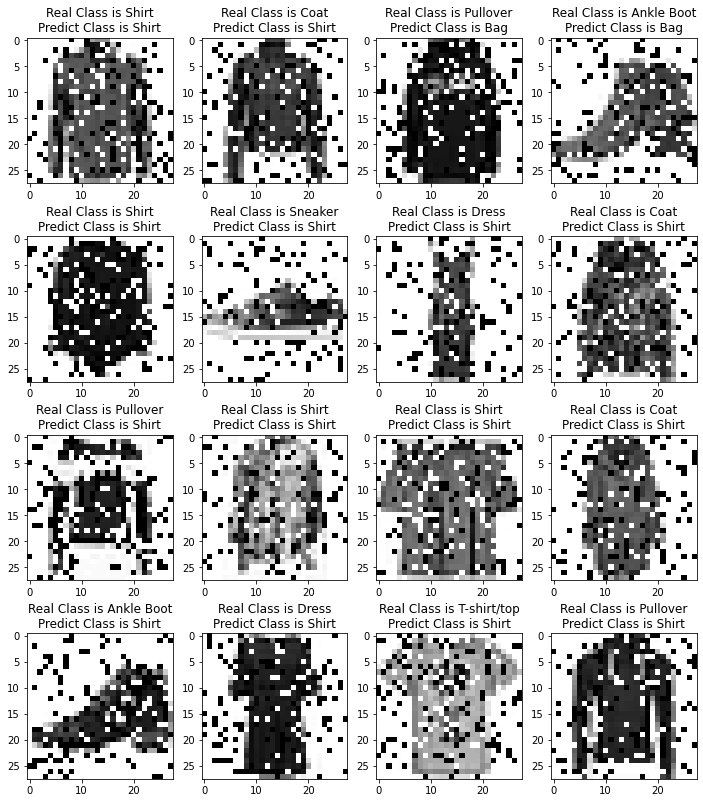

In [18]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(X_testt)
X_test__ = X_testt.reshape(X_testt.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_testt[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}");

In [24]:
#Generate Plots
train_loss = train_model.history['loss']
train_acc = train_model.history['accuracy']
xc = range(No_epochs)

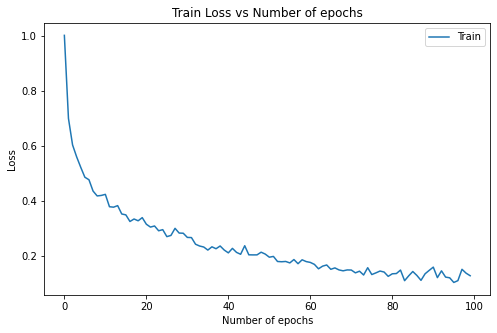

In [25]:
plt.figure(1, figsize=(8,5))
plt.plot(xc,train_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Train Loss vs Number of epochs")
plt.legend(['Train'])

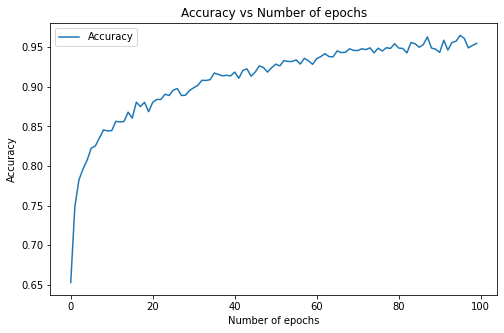

In [26]:
plt.figure(2, figsize=(8,5))
plt.plot(xc,train_acc)
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of epochs")
plt.legend(['Accuracy'])